In [8]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder , MinMaxScaler ,FunctionTransformer ,OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

In [2]:

pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('./accepted_2007_to_2018Q4.csv')
data.head(5)

C:\Users\user\AppData\Local\Temp\ipykernel_8960\916950331.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./accepted_2007_to_2018Q4.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [4]:
columns_to_keep = ['loan_amnt','int_rate','installment','emp_title','emp_length','home_ownership','annual_inc','loan_status','purpose','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies','zip_code','addr_state', 'grade' , 'collections_12_mths_ex_med']

# 컬럼 제외하고 나머지 삭제
data.drop(columns=[col for col in data.columns if col not in columns_to_keep], inplace=True)

In [5]:
data = data.dropna()

In [ ]:
target_1 = {'Fully Paid':0 , 'Current':1 , 'Charged Off':2, 'Late (31-120 days)' : 3 , 'In Grace Period': 4, 'Late (16-30 days)':5, 'Does not meet the credit policy. Status:Fully Paid':6 , 'Does not meet the credit policy. Status:Charged Off':7,'Default': 8 }
data['loan_status']= data['loan_status'].map(target_1)

In [7]:
y = data['loan_status']

data= data.drop('loan_status' , axis = 1)
X = data

In [11]:
y.value_counts(dropna=False)

Fully Paid            974477
Current               799478
Charged Off           239537
Late (31-120 days)     19414
In Grace Period         7753
Late (16-30 days)       3841
Default                   34
Name: loan_status, dtype: int64

In [23]:
X.value_counts(dropna=False)

loan_amnt  int_rate  installment  grade  emp_title                    emp_length  home_ownership  annual_inc  purpose             zip_code  addr_state  dti    open_acc  pub_rec  revol_bal  revol_util  total_acc  collections_12_mths_ex_med  mort_acc  pub_rec_bankruptcies
1000.0     5.31      30.12        A      Assistant Manager            4 years     RENT            37000.0     debt_consolidation  015xx     MA          6.39   4.0       0.0      1605.0     5.9         10.0       0.0                         0.0       0.0                     1
18000.0    13.99     615.11       C      Founder                      10+ years   RENT            84000.0     debt_consolidation  908xx     CA          32.29  23.0      0.0      17918.0    36.9        33.0       0.0                         0.0       0.0                     1
                                         Lab Supervisor               10+ years   MORTGAGE        78000.0     credit_card         850xx     AZ          14.83  12.0      0.0     

# DBSCAN

### 1. 3 class

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./Multi_3_train.csv')
df

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mort_acc,emp
0,-1.266806,0.186395,-1.229216,0.333333,1.0,-0.530591,0.0,-1.455031,-0.848763,-0.343830,-0.761249,-0.853117,-0.950571,0.0,-0.282848,1.0
1,1.050262,-0.227807,1.408748,0.333333,1.0,-0.278171,0.0,-0.277060,1.874316,-0.343830,0.306938,-1.281604,1.181235,0.0,1.314449,1.0
2,0.534138,-0.478399,-0.057767,0.166667,1.0,-0.328655,0.0,-0.889837,-1.030301,-0.343830,-0.469774,0.228304,-0.524210,0.0,1.846882,1.0
3,2.181343,0.364502,1.445144,0.333333,1.0,0.857719,0.0,-0.161003,0.240469,-0.343830,-0.473601,-1.591748,-0.609482,0.0,-0.282848,1.0
4,-0.520073,1.938469,-0.597845,0.833333,0.3,0.717197,0.0,0.803425,0.058930,-0.343830,0.333150,0.567013,0.925418,0.0,2.379314,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003508,0.973392,-0.062126,0.361583,0.333333,0.7,0.479089,0.0,0.134940,-1.211840,-0.343830,1.903708,1.379098,2.545591,0.0,-0.815281,1.0
2003509,0.973392,-0.538458,0.256556,0.166667,1.0,0.807235,0.0,1.914084,2.237393,1.416945,0.318074,-0.473600,2.886680,0.0,1.314449,1.0
2003510,2.730411,-0.538458,1.557359,0.166667,0.9,3.811034,0.0,-0.661206,-1.211840,-0.343830,-0.426145,0.583336,1.095963,0.0,0.782017,1.0
2003511,0.973392,0.289945,0.441261,0.333333,0.6,0.857719,2.0,-0.017093,-0.304147,1.416945,0.088276,0.713923,0.584329,0.0,0.249584,1.0


In [4]:

feature_names = ['loan_amnt' , 'int_rate','installment','grade','emp_length','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','collections_12_mths_ex_med','mort_acc','emp']
df_db = pd.DataFrame(data = df, columns= feature_names)
df_db['loan_status'] = df['loan_status']
df_db.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mort_acc,emp,loan_status
0,-1.266806,0.186395,-1.229216,0.333333,1.0,-0.530591,-1.455031,-0.848763,-0.34383,-0.761249,-0.853117,-0.950571,0.0,-0.282848,1.0,0.0
1,1.050262,-0.227807,1.408748,0.333333,1.0,-0.278171,-0.277060,1.874316,-0.34383,0.306938,-1.281604,1.181235,0.0,1.314449,1.0,0.0
2,0.534138,-0.478399,-0.057767,0.166667,1.0,-0.328655,-0.889837,-1.030301,-0.34383,-0.469774,0.228304,-0.524210,0.0,1.846882,1.0,0.0
3,2.181343,0.364502,1.445144,0.333333,1.0,0.857719,-0.161003,0.240469,-0.34383,-0.473601,-1.591748,-0.609482,0.0,-0.282848,1.0,0.0
4,-0.520073,1.938469,-0.597845,0.833333,0.3,0.717197,0.803425,0.058930,-0.34383,0.333150,0.567013,0.925418,0.0,2.379314,1.0,0.0


In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN( 
    eps=0.6,
    min_samples=8,
    metric='euclidean'     
)

dbscan_labels = dbscan.fit_predict(df)
df_db['dbscan_cluster'] = dbscan_labels

df_db.head(5)



,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mort_acc,emp,loan_status,dbscan_cluster
0,-1.266806,0.186395,-1.229216,0.333333,1.0,-0.530591,-1.455031,-0.848763,-0.34383,-0.761249,-0.853117,-0.950571,0.0,-0.282848,1.0,0.0,0
1,1.050262,-0.227807,1.408748,0.333333,1.0,-0.278171,-0.277060,1.874316,-0.34383,0.306938,-1.281604,1.181235,0.0,1.314449,1.0,0.0,-1
2,0.534138,-0.478399,-0.057767,0.166667,1.0,-0.328655,-0.889837,-1.030301,-0.34383,-0.469774,0.228304,-0.524210,0.0,1.846882,1.0,0.0,-1
3,2.181343,0.364502,1.445144,0.333333,1.0,0.857719,-0.161003,0.240469,-0.34383,-0.473601,-1.591748,-0.609482,0.0,-0.282848,1.0,0.0,-1
4,-0.520073,1.938469,-0.597845,0.833333,0.3,0.717197,0.803425,0.058930,-0.34383,0.333150,0.567013,0.925418,0.0,2.379314,1.0,0.0,-1


In [11]:
df['dbscan_cluster'] = dbscan_labels

In [14]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

IndexError: list index out of range

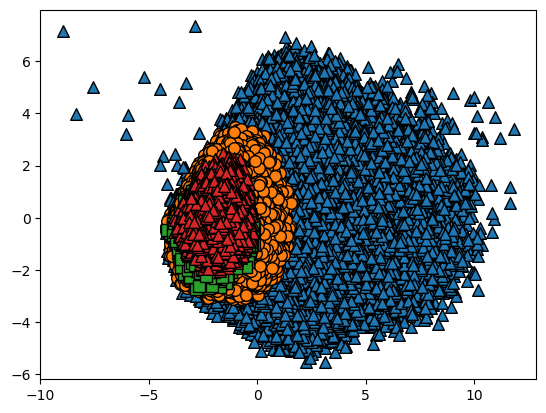

In [15]:
from sklearn.decomposition import PCA

# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(df)

# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
df_db['ftr1'] = pca_transformed[:,0]
df_db['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, df_db, 'dbscan_cluster', iscenter=False)